#  ROC (Receiver Operating Characteristic )  Curve
# AUC (Area Under the Curve ) Score


In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('breast_cancer.csv')
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [23]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()
data.outcome.value_counts()

0    357
1    212
Name: outcome, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.shape , X_test.shape

((398, 30), (171, 30))

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test) #---> model predictions
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [45]:
#preicdting with respect to specific threshold value


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
# y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred = (model.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))



0.9473684210526315


In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_predict))

pd.crosstab(y_test,y_predict)

0.9473684210526315


col_0,0,1
outcome,,
0,106,6
1,3,56


In [29]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
model.predict_proba(X_test)

array([[7.79559400e-03, 9.92204406e-01],
       [9.99688751e-01, 3.11248778e-04],
       [9.96839260e-01, 3.16074005e-03],
       [2.53320833e-04, 9.99746679e-01],
       [9.93946032e-01, 6.05396784e-03],
       [9.73779008e-01, 2.62209920e-02],
       [9.99503729e-01, 4.96271124e-04],
       [2.10888515e-01, 7.89111485e-01],
       [3.09964508e-06, 9.99996900e-01],
       [7.47522376e-02, 9.25247762e-01],
       [9.99631943e-01, 3.68056796e-04],
       [9.99193644e-01, 8.06356031e-04],
       [2.74067465e-01, 7.25932535e-01],
       [9.98010703e-01, 1.98929702e-03],
       [1.23593484e-03, 9.98764065e-01],
       [2.19355315e-03, 9.97806447e-01],
       [9.97787283e-01, 2.21271741e-03],
       [8.97705946e-01, 1.02294054e-01],
       [9.22859494e-01, 7.71405060e-02],
       [1.58724338e-02, 9.84127566e-01],
       [1.93741626e-01, 8.06258374e-01],
       [8.29086565e-01, 1.70913435e-01],
       [9.86035726e-01, 1.39642736e-02],
       [9.70043878e-01, 2.99561224e-02],
       [1.027162

In [31]:
import numpy as np
y_predict_th2 = np.where(model.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0)
y_predict_th2# Threshold is 0.4

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [32]:
pd.crosstab(y_test,y_predict_th2)

col_0,0,1
outcome,,
0,105,7
1,2,57


In [33]:

def predict_threshold (model,X_test,thresholds):
    #import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [34]:
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))
    print("accuracy score for" , thr , "is", accuracy_score(y_test, y_predict))
    print("f1 score ", f1_score(y_test, y_predict))

Threshold : 0.0
[[  0 112]
 [  0  59]]
accuracy score for 0.0 is 0.34502923976608185
f1 score  0.5130434782608695
Threshold : 0.1
[[100  12]
 [  1  58]]
accuracy score for 0.1 is 0.9239766081871345
f1 score  0.8992248062015504
Threshold : 0.2
[[105   7]
 [  2  57]]
accuracy score for 0.2 is 0.9473684210526315
f1 score  0.9268292682926829
Threshold : 0.30000000000000004
[[106   6]
 [  3  56]]
accuracy score for 0.30000000000000004 is 0.9473684210526315
f1 score  0.9256198347107438
Threshold : 0.4
[[106   6]
 [  3  56]]
accuracy score for 0.4 is 0.9473684210526315
f1 score  0.9256198347107438
Threshold : 0.5
[[106   6]
 [  3  56]]
accuracy score for 0.5 is 0.9473684210526315
f1 score  0.9256198347107438
Threshold : 0.6000000000000001
[[106   6]
 [  3  56]]
accuracy score for 0.6000000000000001 is 0.9473684210526315
f1 score  0.9256198347107438
Threshold : 0.7000000000000001
[[106   6]
 [  4  55]]
accuracy score for 0.7000000000000001 is 0.9415204678362573
f1 score  0.9166666666666666
Thr

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [35]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.85951321e-01, 9.84127566e-01,
       9.77549317e-01, 9.70377882e-01, 9.25247762e-01, 8.89857754e-01,
       8.06258374e-01, 7.46208941e-01, 2.68292328e-01, 1.74237520e-01,
       1.70913435e-01, 5.38752792e-02, 4.67149605e-02, 2.77797183e-05])

0.9909200968523002


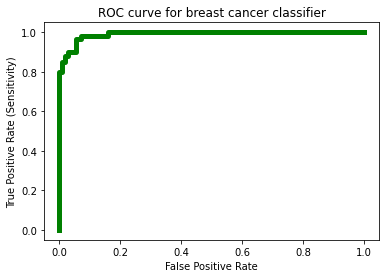

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

y_predict = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.plot(fpr, tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict))
plt.show()

In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


``The optimal cut off would be where tpr is high and fpr is low``
``The ROC curve shows how tpr and fpr varies at every possible threshold``

[0.         0.08474576 0.79661017 0.79661017 0.84745763 0.84745763
 0.88135593 0.88135593 0.89830508 0.89830508 0.96610169 0.96610169
 0.98305085 0.98305085 1.         1.        ]
[0.         0.         0.         0.00892857 0.00892857 0.01785714
 0.01785714 0.02678571 0.02678571 0.05357143 0.05357143 0.07142857
 0.07142857 0.16071429 0.16071429 1.        ]
[2.00000000e+00 1.00000000e+00 9.85951321e-01 9.84127566e-01
 9.77549317e-01 9.70377882e-01 9.25247762e-01 8.89857754e-01
 8.06258374e-01 7.46208941e-01 2.68292328e-01 1.74237520e-01
 1.70913435e-01 5.38752792e-02 4.67149605e-02 2.77797183e-05]
0.9909200968523002
10
Threshold value is: 0.2682923279855817


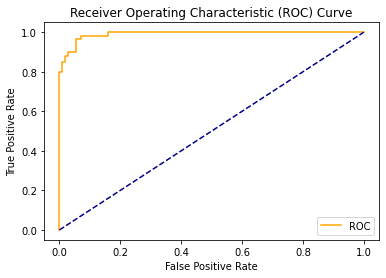

In [40]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)


#tuple unpacking 
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test,y_predict))
optimal_idx = np.argmax(tpr - fpr)
print(optimal_idx)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)